In [1]:
import pandas as pd


In [4]:
home_data = pd.read_csv('housing8.csv',names=['longitude','latitude','median_house_value'])
home_data.head()

,,,,,,,,,,,longitude,latitude,median_house_value
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
home_data.columns

Index(['longitude', 'latitude', 'median_house_value'], dtype='object')

<Axes: xlabel='longitude', ylabel='latitude'>

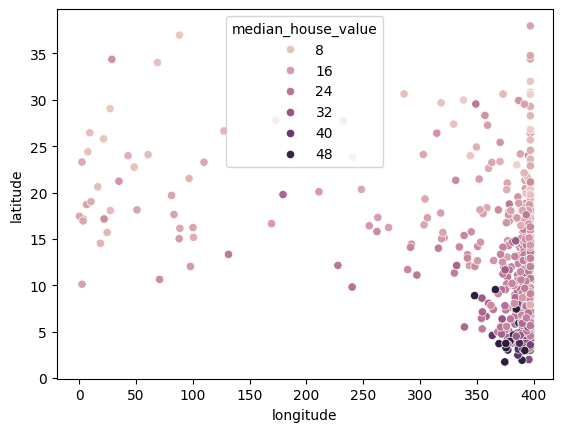

In [7]:
import seaborn as sns
sns.scatterplot(data=home_data,x='longitude',y='latitude',hue='median_house_value')

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(home_data[['latitude','longitude']],home_data[['median_house_value']],test_size=0.33,random_state=1)

In [9]:
from sklearn import preprocessing

x_train_norm = preprocessing.normalize(x_train)
x_test_norm = preprocessing.normalize(x_test)

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0,n_init=3)
kmeans.fit(x_train_norm)

KMeans(n_clusters=3, n_init=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

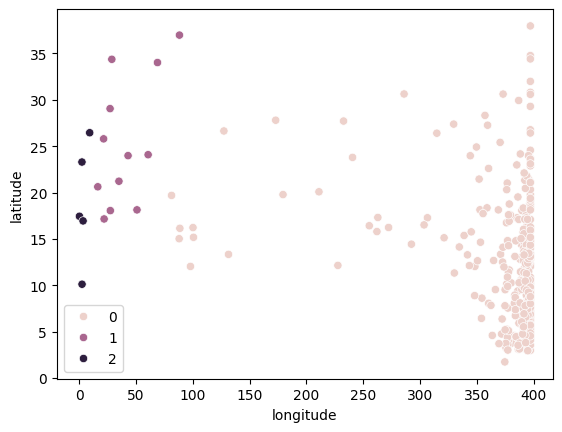

In [11]:
sns.scatterplot(data=x_train,x='longitude',y='latitude',hue=kmeans.labels_)

In [12]:
from sklearn.metrics import silhouette_score
silhouette_score(x_train_norm,kmeans.labels_,metric='euclidean')

0.9281782108999282